In [11]:
%load_ext autoreload
%autoreload 2

In [12]:
import numpy as np
from PIL import Image

arr = np.load("/home/postech2/datasets/cityscapes/gtFine/train/bochum/bochum_000000_000313_gtFine_labelTrainIds_divide_32_slots_19.npy")
print(arr.shape)

(32, 64, 19)


In [43]:
from cityscapes.dataloader import CityScapesDividedDataset
from torch.utils.data import DataLoader
from IPython.display import display
from PIL import Image
import numpy as np
from tqdm import tqdm
import time
ds = CityScapesDividedDataset(2048, 1024, 32)
dl = DataLoader(ds, batch_size=1024, num_workers=16)

pbar = tqdm(dl)
for img, label in pbar:
    pbar.set_postfix_str(str(mapper[label[0].nonzero().squeeze()]))

 30%|██▉       | 1782/5950 [00:10<00:24, 170.93it/s, ['building' 'unlabeled']]                            


KeyboardInterrupt: 

In [41]:
for i in range(10):
    print(arr[i, i])
    print(mapper[arr[i, i].nonzero()])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
['building' 'unlabeled']
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
['building']
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
['building']
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
['building']
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
['building']
[0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
['building' 'vegetation']
[0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
['building' 'vegetation']
[0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
['building' 'vegetation']
[0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
['building' 'vegetation']
[0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
['building' 'vegetation']


In [58]:
import os, glob
import pandas as pd
import matplotlib.pyplot as plt


def load_arr(divide_size):
    return np.array([np.load(filename) for filename in glob.glob(f'/home/postech2/datasets/cityscapes/gtFine/train/**/*_labelTrainIds_divide_{divide_size}_slots_19.npy')])
def class_hist(divide_size):
    l = load_arr(divide_size)
    l = l.reshape((-1, l.shape[-1]))
    nz = np.count_nonzero(l, axis=1)
    hist, bin_edges = np.histogram(nz, bins='auto', density=True)
    return hist, bin_edges

def nonzeros(divide_size):
    l = load_arr(divide_size)
    l = l.reshape((-1, l.shape[-1]))
    nz = np.count_nonzero(l, axis=1)
    return np.bincount(nz).astype(np.float32) / l.shape[0]

In [59]:
l = load_arr(16)
l = l.reshape((-1, l.shape[-1]))
l.shape

(24371200, 19)

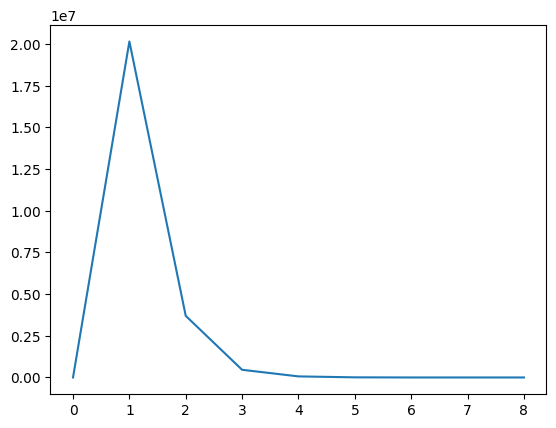

In [60]:
nonzero_plot(16)

In [43]:
print(load_arr(16).shape)
print(load_arr(32).shape)
print(load_arr(64).shape)

(2975, 64, 128, 19)
(2975, 32, 64, 19)
(2975, 16, 32, 19)


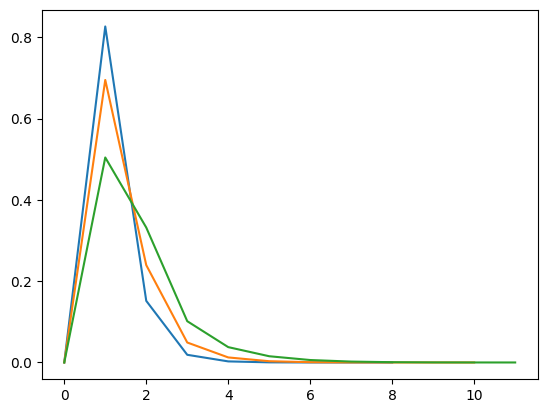

In [65]:
import matplotlib.pyplot as plt

for ds in [16, 32, 64]:
    plt.plot(nonzeros(ds))
plt.show()

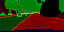

In [68]:

Image.fromarray(np.packbits(arr, axis=2))

(32, 32, 3)


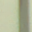

In [79]:
arr_img = np.load("/home/postech2/datasets/cityscapes/leftImg8bit/train/aachen/aachen_000000_000019_leftImg8bit_divide_32.npy")
print(arr_img[0, 0].shape)
Image.fromarray(arr_img[0, 0].astype(np.uint8))

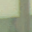

In [80]:

Image.fromarray(arr_img[1, 0].astype(np.uint8))

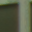

In [81]:

Image.fromarray(arr_img[2, 0].astype(np.uint8))

In [ ]:
arr = np.load("/home/postech2/irn/VOCdevkit/VOC2012/Divided/2007_000032_2_0_1_img.npy")
label = np.load("/home/postech2/irn/VOCdevkit/VOC2012/Divided/2007_000032_2_0_1_label.npy")
print(cats[label.nonzero()])
Image.fromarray(arr)

In [ ]:
arr = np.load("/home/postech2/irn/VOCdevkit/VOC2012/Divided/2007_000032_2_1_0_img.npy")
label = np.load("/home/postech2/irn/VOCdevkit/VOC2012/Divided/2007_000032_2_1_0_label.npy")
print(cats[label.nonzero()])
Image.fromarray(arr)

In [ ]:
arr = np.load("/home/postech2/irn/VOCdevkit/VOC2012/Divided/2007_000032_2_1_1_img.npy")
label = np.load("/home/postech2/irn/VOCdevkit/VOC2012/Divided/2007_000032_2_1_1_label.npy")
print(cats[label.nonzero()])
Image.fromarray(arr)

In [ ]:
arr = np.load("/home/postech2/irn/VOCdevkit/VOC2012/Divided/2007_001487_2_0_1_img.npy")
label = np.load("/home/postech2/irn/VOCdevkit/VOC2012/Divided/2007_001487_2_0_1_label.npy")
print(cats[label.nonzero()])
Image.fromarray(arr)

In [21]:
from cityscapes.dataloader import CityScapesDividedDataset, Divide
from torch.utils.data import DataLoader
from IPython.display import display
from PIL import Image
import numpy as np
from tqdm import tqdm
import time
ds = CityScapesDividedDataset(Divide.Train, 2048, 1024, 128)
dl = DataLoader(ds, batch_size=1024, num_workers=16)

In [22]:
from cityscapesScripts.cityscapesscripts.helpers.labels import trainId2label
mapper = np.zeros((19, ), dtype=object)
for trainId, label in trainId2label.items():
    if trainId == 255 or trainId == -1:
        trainId = 18
    print(label.name)
    mapper[trainId] = label.name
mapper

license plate
bicycle
motorcycle
train
unlabeled
bus
truck
car
rider
person
sky
terrain
vegetation
traffic sign
traffic light
pole
fence
wall
building
sidewalk
road


array(['road', 'sidewalk', 'building', 'wall', 'fence', 'pole',
       'traffic light', 'traffic sign', 'vegetation', 'terrain', 'sky',
       'person', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle',
       'unlabeled'], dtype=object)

['building']


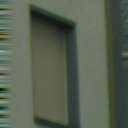

In [23]:

a, b, c = ds[0]
b = b.nonzero()[0]

print(mapper[b[b<19]])
Image.fromarray(a)

['road' 'sidewalk' 'fence' 'terrain']


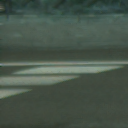

In [24]:

a, b, c = ds[64]
b = b.nonzero()[0]

print(mapper[b[b<19]])
Image.fromarray(a)